<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Varying-group-size-effect-on-user-vector" data-toc-modified-id="Varying-group-size-effect-on-user-vector-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Varying group size effect on user vector</a></span></li><li><span><a href="#When-basket-count-=-100" data-toc-modified-id="When-basket-count-=-100-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>When basket count = 100</a></span></li><li><span><a href="#explosion-issue-basket-count-=-200" data-toc-modified-id="explosion-issue-basket-count-=-200-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>explosion issue basket count = 200</a></span></li><li><span><a href="#error-curve-fitting" data-toc-modified-id="error-curve-fitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>error curve fitting</a></span></li><li><span><a href="#error-comparison:-ill-condition-decremenal-case-due-to->1-coefficient" data-toc-modified-id="error-comparison:-ill-condition-decremenal-case-due-to->1-coefficient-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>error comparison: ill-condition decremenal case due to &gt;1 coefficient</a></span></li><li><span><a href="#recompute-everytime-to-the-rescue" data-toc-modified-id="recompute-everytime-to-the-rescue-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>recompute everytime to the rescue</a></span></li><li><span><a href="#baseline-incremental-case" data-toc-modified-id="baseline-incremental-case-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>baseline incremental case</a></span></li><li><span><a href="#Baseline-decremental-case" data-toc-modified-id="Baseline-decremental-case-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Baseline decremental case</a></span></li><li><span><a href="#Improved-incremental-case" data-toc-modified-id="Improved-incremental-case-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Improved incremental case</a></span></li><li><span><a href="#Improved-vs-baseline" data-toc-modified-id="Improved-vs-baseline-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Improved vs baseline</a></span></li><li><span><a href="#Improved-decremetal-case-decremental-from-end" data-toc-modified-id="Improved-decremetal-case-decremental-from-end-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Improved decremetal case decremental from end</a></span></li><li><span><a href="#Improved-decremetal-case-decremental-from-start" data-toc-modified-id="Improved-decremetal-case-decremental-from-start-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Improved decremetal case decremental from start</a></span></li><li><span><a href="#Improved-decremetal-case-decremental-from-random-place" data-toc-modified-id="Improved-decremetal-case-decremental-from-random-place-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Improved decremetal case decremental from random place</a></span></li><li><span><a href="#Improved-decremental-in-one-plot" data-toc-modified-id="Improved-decremental-in-one-plot-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Improved decremental in one plot</a></span></li><li><span><a href="#hyper-parameters:-group-size" data-toc-modified-id="hyper-parameters:-group-size-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>hyper-parameters: group size</a></span></li><li><span><a href="#hyper-parameters:-rg" data-toc-modified-id="hyper-parameters:-rg-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>hyper-parameters: rg</a></span></li><li><span><a href="#hyper-parameters:-rb" data-toc-modified-id="hyper-parameters:-rb-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>hyper-parameters: rb</a></span></li></ul></div>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# sebastian academic style settings
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.markersize'] = 2
plt.rc('axes', labelsize=28) 
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.rc('savefig', dpi=300)

# Varying group size effect on user vector

- Incremental case: user vector norm exp. decreasing
- decremental from the very end one by one gives us perfect approximation, i.e., removing baskets has the same effect as if these baskets were never added.
- decremental from the very beginning has very small error, because the number of varying size groups introduced are minimal
- decremental from random places gives more error, because the number of varying groups is much more. Good thing is the exponentially decaying effect is obvious.


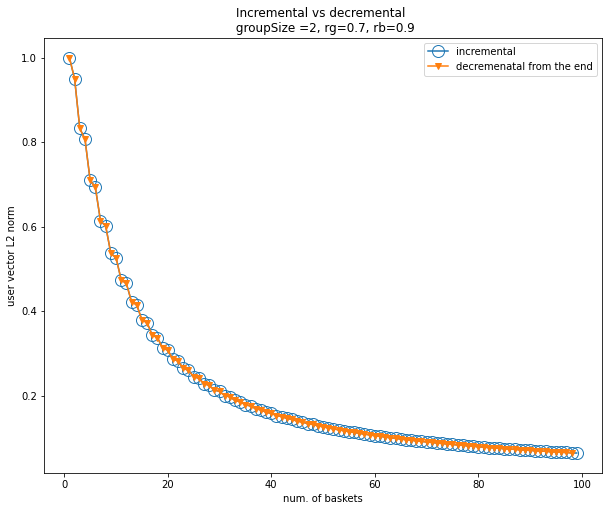

In [197]:
# this is the decremental from end data
eval_df = pd.read_csv("../eval_results/time_2021-03-23-17-01.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df = eval_df.iloc[0:99]
dec_df = eval_df.iloc[99:-1]
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df.batchId + 1, inc_df.val, label="incremental",  marker='o', markersize=12, markerfacecolor='none')
ax.plot(197-dec_df.batchId, dec_df.val, label="decremenatal from the end",  marker='v')
ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

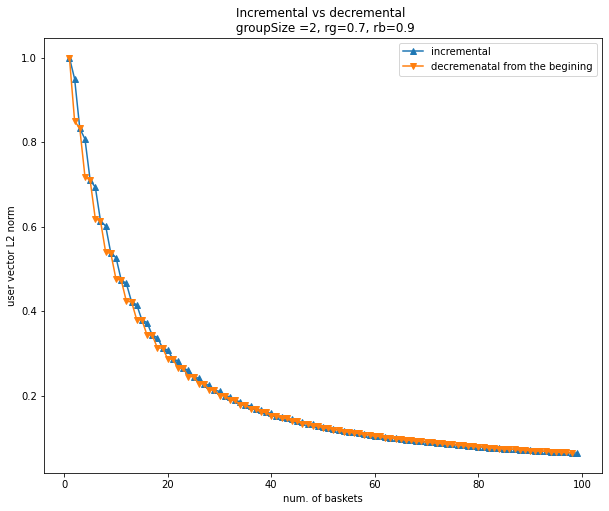

In [199]:
# this is the decremental from begining data
eval_df = pd.read_csv("../eval_results/time_2021-03-23-17-09.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df = eval_df.iloc[0:99]
dec_df = eval_df.iloc[99:-1]
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df.batchId + 1, inc_df.val, label="incremental",  marker='^')
ax.plot(197-dec_df.batchId, dec_df.val, label="decremenatal from the begining",  marker='v')
ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

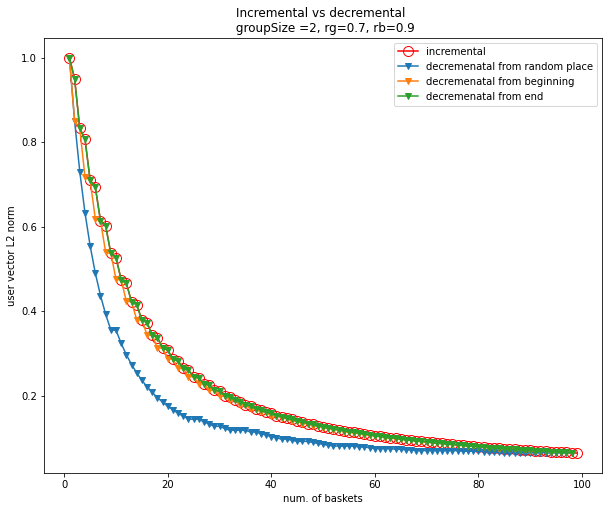

In [3]:
# 2021-03-24 dont touch this!


# this is the decremental from random
eval_df_random = pd.read_csv("../eval_results/time_2021-03-23-17-27.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df_random = eval_df_random.iloc[0:99]
dec_df_random = eval_df_random.iloc[99:-1]

# this is the decremental from begining data
eval_df_beginning = pd.read_csv("../eval_results/time_2021-03-23-17-09.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df_beginning = eval_df_beginning.iloc[0:99]
dec_df_beginning = eval_df_beginning.iloc[99:-1]

# this is the decremental from end data

eval_df_end = pd.read_csv("../eval_results/time_2021-03-23-17-01.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df_end = eval_df_end.iloc[0:99]
dec_df_end = eval_df_end.iloc[99:-1]


fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()

ax.plot(inc_df_random.batchId + 1, inc_df_random.val, label="incremental",
        marker='o', markerfacecolor='none', markersize=10, color="r")
ax.plot(197-dec_df_random.batchId, dec_df_random.val, label="decremenatal from random place",  marker='v')

ax.plot(197-dec_df_beginning.batchId, dec_df_beginning.val, label="decremenatal from beginning",  marker='v')

ax.plot(197-dec_df_end.batchId, dec_df_end.val, label="decremenatal from end",  marker='v')


ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

# When basket count = 100

- This is totally as excepected, because the decremental process starts from the end, no group composition is changed, we have perfect estimation of user vector values.

In [14]:
eval_df2 = pd.read_csv("../temp/output_batch_time_2021-03-24-22-38.csv")
eval_df2

,batchId,ms,groupSize,rg,rb,userVectorFirstEle,lastGroupVectorFirstEle
0,0.0,1950.408300,2.0,0.7,0.9,1.000000,1.00
1,1.0,777.782390,2.0,0.7,0.9,0.950000,0.95
2,2.0,405.163847,2.0,0.7,0.9,0.832500,1.00
3,3.0,364.591493,2.0,0.7,0.9,0.807500,0.95
4,4.0,333.516774,2.0,0.7,0.9,0.710167,1.00
...,...,...,...,...,...,...,...
195,195.0,104.254535,2.0,0.7,0.9,0.807500,0.95
196,196.0,156.246475,2.0,0.7,0.9,0.832500,1.00
197,197.0,109.701608,2.0,0.7,0.9,0.950000,0.95
198,198.0,115.001278,2.0,0.7,0.9,1.000000,1.00


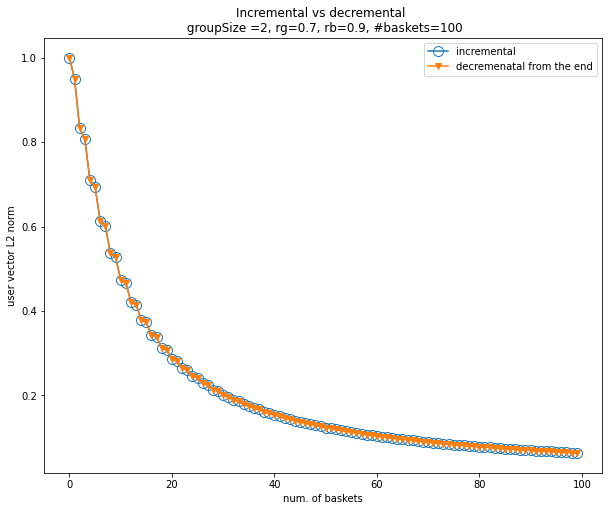

In [184]:
# this is the decremental from begining data
eval_df100 = pd.read_csv("../temp/output_batch_time_2021-03-24-22-38.csv")
inc_df100 = eval_df100.iloc[0:100]
dec_df100 = eval_df100.iloc[99:-1]
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df100.batchId , inc_df100.userVectorFirstEle, label="incremental",  marker='o',
        markerfacecolor='none', markersize=10)
ax.plot(198-dec_df100.batchId, dec_df100.userVectorFirstEle, label="decremenatal from the end",  marker='v')
ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9, #baskets=100')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

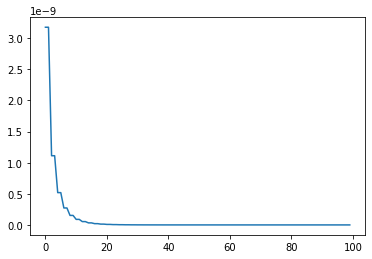

In [180]:
inc_array = inc_df2.userVectorFirstEle.to_numpy()

dec_array = dec_df2.userVectorFirstEle.to_numpy()

err = dec_array[::-1] - inc_array
plt.plot(err)

# explosion issue basket count = 200

- Strange enough, the further we decrement the baskets, when we have less and less baskets left, the decremental
user vector value start to explode explonetially.

- Why does this happen??

- Maybe we should clamp the value to less than 1？


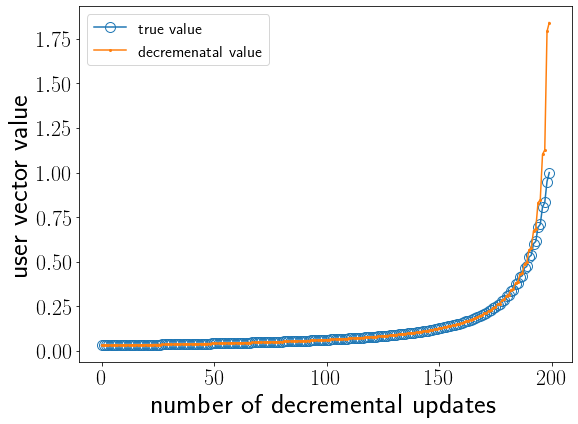

In [2]:
# this is the decremental from begining data
eval_df200 = pd.read_csv("../temp/output_batch_time_2021-03-24-22-53.csv")
inc_df200 = eval_df200.iloc[0:200]
dec_df200 = eval_df200.iloc[199:-1] # we start counting from 200 -1 to share the last value
fig = plt.figure(figsize=(8,6))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df200.batchId[::-1] , inc_df200.userVectorFirstEle, label="true value",  marker='o',
        markerfacecolor='none', markersize=10)
ax.plot(398-dec_df200.batchId[::-1], dec_df200.userVectorFirstEle, label="decremenatal value",  marker='o') # 2*200-2

#### uncomment if you want to plot 100 baskets together in #
# ax.plot(inc_df2.batchId , inc_df2.userVectorFirstEle, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
# ax.plot(198-dec_df2.batchId, dec_df2.userVectorFirstEle, label="decremenatal from the end",  marker='v')

# ax.set_title('Decremental updates error')
ax.set_xlabel("number of decremental updates")
ax.set_ylabel("user vector value")
ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/error_dec_abs.pdf", bbox_inches='tight')

# error curve fitting

- We fit the error to function of $f(n) = \alpha^{n-k}$, which can be rewritten as  $f(n) = \epsilon \alpha^{n}$ as in my thesis analysis

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

inc_array = inc_df200.userVectorFirstEle.to_numpy()

dec_array = dec_df200.userVectorFirstEle.to_numpy()

err = dec_array[::-1] - inc_array
xdata = range(len(err), 0,-1)
ydata = err


def func(n, alpha, k):
    return pow(alpha,n-k)
# fig = plt.figure(figsize=(8,6))
# ax = plt.subplot()

popt, pcov = curve_fit(func, list(xdata), ydata, bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
ax.scatter(xdata, ydata, label="error")
ax.plot(xdata, func(list(xdata), *popt), 'r-',
         label='error fitting: $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))
ax.set_xlabel("number of decremental updates")
ax.set_ylabel("numerical error")
# ax.set_title("Numerical error for decremental updates")

ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/error_dec.pdf", bbox_inches='tight')

[  1.47749683 200.20979789]


<Figure size 432x288 with 0 Axes>

[  1.47749683 200.20979789]


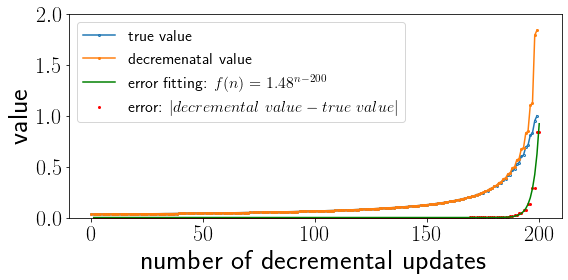

In [20]:
# putting together both error plots
# this is the decremental from begining data
eval_df200 = pd.read_csv("../temp/output_batch_time_2021-03-24-22-53.csv")
inc_df200 = eval_df200.iloc[0:200]
dec_df200 = eval_df200.iloc[199:-1] # we start counting from 200 -1 to share the last value
fig = plt.figure(figsize=(8,4))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df200.batchId[::-1] , inc_df200.userVectorFirstEle, label="true value",  marker='o',
        markerfacecolor='none')
ax.plot(398-dec_df200.batchId[::-1], dec_df200.userVectorFirstEle, label="decremenatal value",  marker='o') # 2*200-2

#### uncomment if you want to plot 100 baskets together in #
# ax.plot(inc_df2.batchId , inc_df2.userVectorFirstEle, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
# ax.plot(198-dec_df2.batchId, dec_df2.userVectorFirstEle, label="decremenatal from the end",  marker='v')

# ax.set_title('Decremental updates error')
ax.set_xlabel("number of decremental updates")
ax.set_ylabel("user vector value")
ax.legend();
plt.tight_layout()
# fig.savefig("../artifacts/error_dec_abs.pdf", bbox_inches='tight')



import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

inc_array = inc_df200.userVectorFirstEle.to_numpy()

dec_array = dec_df200.userVectorFirstEle.to_numpy()

err = dec_array[::-1] - inc_array
xdata = range(len(err), 0,-1)
ydata = err


def func(n, alpha, k):
    return pow(alpha,n-k)
# fig = plt.figure(figsize=(8,6))
# ax = plt.subplot()

popt, pcov = curve_fit(func, list(xdata), ydata, bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
ax.scatter(xdata, ydata,  c="r", label="error: $|decremental\ value - true\ value|$")
ax.plot(xdata, func(list(xdata), *popt), 'g-',
         label='error fitting: $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))
ax.set_xlabel("number of decremental updates")
ax.set_ylabel("value")
# ax.set_title("Numerical error for decremental updates")
ax.set_ylim([0,2])
ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/error_dec_combine.pdf", bbox_inches='tight')
plt.show()

In [35]:
inc_array = inc_df200.userVectorFirstEle.to_numpy()

dec_array = dec_df200.userVectorFirstEle.to_numpy()

err = dec_array - inc_array[::-1]
relative_err = err/inc_array[::-1]
relative_err

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.13559740e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.20716094e-16,  4.14176465e-16,  4.16333634e-16,  4.09862127e-16,
        6.17926762e-16,  6.08321683e-16,  1.01892179e-15,  1.00308363e-15,
        1.81433815e-15,  1.78613601e-15,  2.79162658e-15,  2.74823342e-15,
        4.14142405e-15,  4.27119480e-15,  6.24062205e-15,  6.14361757e-15,
        8.87009764e-15,  8.73222047e-15,  1.25820407e-14,  1.27618123e-14,
        1.80907920e-14,  1.78095880e-14,  2.58893784e-14,  2.54869528e-14,
        3.68126582e-14,  3.64216429e-14,  5.27428978e-14,  5.17440149e-14,
        7.52862684e-14,  7.42929034e-14,  1.07558699e-13,  1.05712071e-13,
        1.53561374e-13,  1.51346983e-13,  2.19153643e-13,  2.16258358e-13,
        3.13630700e-13,  3.08923871e-13,  4.48301484e-13,  4.41333067e-13,
        6.40487663e-13,  6.30695841e-13,  9.15386188e-13,  9.01157387e-13,
        1.30742347e-12,  

In [43]:
# meaning the relative error starts exceeding 1% from 180 updates
np.argwhere(relative_err > 0.01)

array([[180],
       [181],
       [182],
       [183],
       [184],
       [185],
       [186],
       [187],
       [188],
       [189],
       [190],
       [191],
       [192],
       [193],
       [194],
       [195],
       [196],
       [197],
       [198],
       [199]])

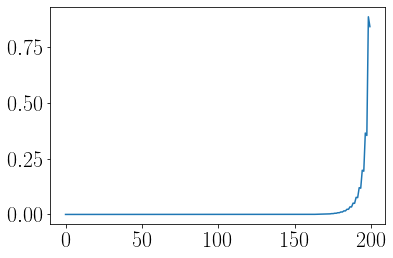

In [41]:
plt.plot(relative_err)

# error comparison: ill-condition decremenal case due to >1 coefficient


- As we can see, the numeric error increases exponentially, this will limit us from incrementing baskets for users
with many baskets

In [268]:
# # error for 100 baskets


# # inc_array100 = inc_df100.userVectorFirstEle.to_numpy()

# # dec_array100 = dec_df100.userVectorFirstEle.to_numpy()



# # error for 200 baskets
# eval_df200 = pd.read_csv("../temp/output_batch_time_2021-03-31-11-44.csv")
# inc_df200 = eval_df200.iloc[0:1000]
# dec_df200 = eval_df200.iloc[999:-1] # we start counting from 200 -1 to share the last value

# inc_array200 = inc_df200.userVectorFirstEle.to_numpy()

# dec_array200 = dec_df200.userVectorFirstEle.to_numpy()

# ax = plt.subplot()


# # err100 = dec_array100[::-1] - inc_array100
# # ax.plot(err100, label="error for basket 100")

# err200 = dec_array200[::-1] - inc_array200
# ax.plot(err200, label="error for basket")

# ax.set_xlabel("#baskets left")
# ax.set_ylabel("#error")
# ax.legend()

# recompute everytime to the rescue

- Now in the decremental case, we recompute every time to avoid numerical instability


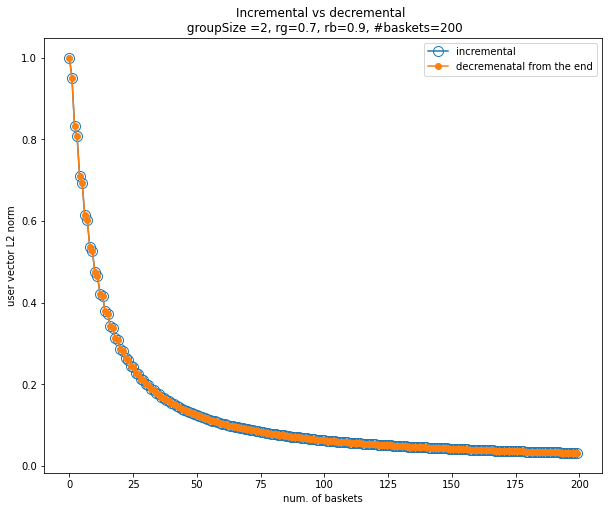

In [60]:
# this is the decremental from begining data
eval_df2 = pd.read_csv("../temp/output_batch_time_2021-03-25-11-11.csv")
inc_df = eval_df2.iloc[0:200]
dec_df = eval_df2.iloc[199:-1] # we start counting from 200 -1 to share the last value
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df.batchId , inc_df.userVectorFirstEle, label="incremental",  marker='o',
        markerfacecolor='none', markersize=10)
ax.plot(398-dec_df.batchId, dec_df.userVectorFirstEle, label="decremenatal from the end",  marker='o') # 2*200-2

#### uncomment if you want to plot 100 baskets together in #
# ax.plot(inc_df2.batchId , inc_df2.userVectorFirstEle, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
# ax.plot(198-dec_df2.batchId, dec_df2.userVectorFirstEle, label="decremenatal from the end",  marker='v')

ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9, #baskets=200')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();


- Now in the decremental case, we recompute every time to avoid numerical instability


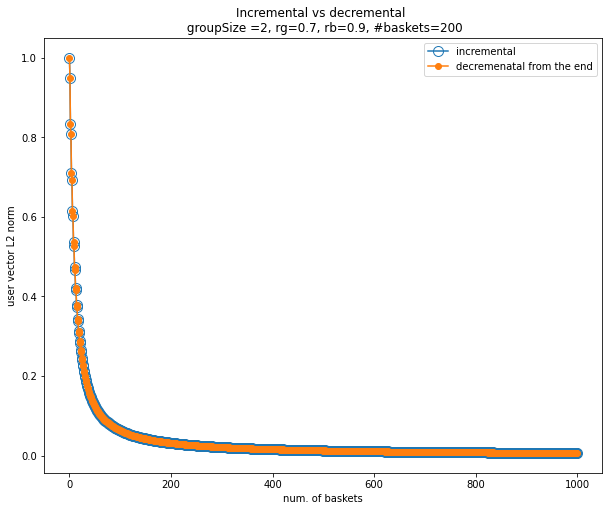

In [61]:
# this is the decremental from begining data
eval_df2 = pd.read_csv("../temp/output_batch_time_2021-03-25-12-05.csv")
inc_df = eval_df2.iloc[0:1000]
dec_df = eval_df2.iloc[999:-1] # we start counting from 200 -1 to share the last value
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df.batchId , inc_df.userVectorFirstEle, label="incremental",  marker='o',
        markerfacecolor='none', markersize=10)
ax.plot(2000-2-dec_df.batchId, dec_df.userVectorFirstEle, label="decremenatal from the end",  marker='o') # 2*200-2

#### uncomment if you want to plot 100 baskets together in #
# ax.plot(inc_df2.batchId , inc_df2.userVectorFirstEle, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
# ax.plot(198-dec_df2.batchId, dec_df2.userVectorFirstEle, label="decremenatal from the end",  marker='v')

ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9, #baskets=200')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

# baseline incremental case

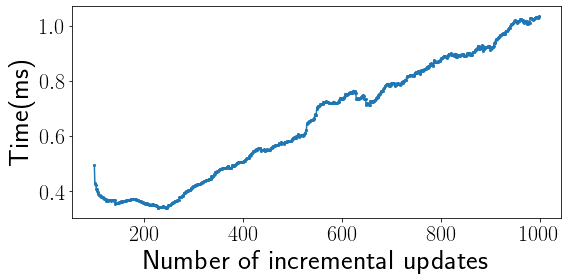

In [79]:
# inc_df = state_update_df.iloc[0:1000]
# this is the decremental from begining data


state_update_df = pd.read_csv("../eval_results/baseline_inc_baskets10/state_update_time_2021-04-02-10-31.csv")
state_update_df1 = pd.read_csv("../eval_results/baseline_inc_baskets10/state_update_time_2021-04-02-11-02.csv")
state_update_df2 = pd.read_csv("../eval_results/baseline_inc_baskets10/state_update_time_2021-04-02-11-49.csv")


inc_df = state_update_df.iloc[0:1000] 
inc_df1 = state_update_df1.iloc[0:1000]
inc_df2 = state_update_df2.iloc[0:1000]

# inc_df is discarded because of a few high peaks
mean_time_baseline_inc = (inc_df1.ms  + inc_df2.ms)/2
# mean_time_baseline_inc = (inc_df1.ms )/1


fig = plt.figure(figsize=(8,4))
ax = plt.subplot()

# calculate the moving average window by n
ax.plot(mean_time_baseline_inc.rolling(100).mean(), label="mean",  marker='o') # 2*200-2

# ax.plot(inc_df1.ms.rolling(10).mean(), label="incremental baseline1",  marker='o') # 2*200-2

# ax.plot(inc_df.ms.rolling(10).mean(), label="incremental baseline",  marker='o') # 2*200-2

# ax.plot(inc_df2.ms.rolling(10).mean(), label="incremental baseline2",  marker='o') # 2*200-2

ax.set_xlabel("Number of incremental updates")
ax.set_ylabel("Time(ms)")
# plt.tick_params(axis='both', which='major', labelsize=22)
# plt.tick_params(axis='both', which='minor', labelsize=22)
# plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
# plt.gcf().savefig('destination.pdf', dpi=300)

fig.savefig("../artifacts/baseline_inc.pdf", bbox_inches='tight')
# ax.legend()

# Baseline decremental case

- In the decremental case, we expect the time taken to update the state to be linearly proportional to the number of baskets left

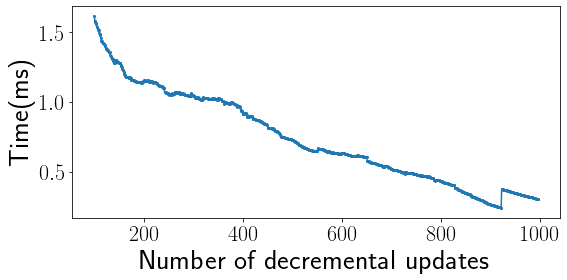

In [76]:
# inc_df = state_update_df.iloc[0:1000]
# this is the decremental from end data
state_update_df = pd.read_csv("../eval_results/baseline_inc_baskets10/state_update_time_2021-04-02-10-31.csv")
state_update_df1 = pd.read_csv("../eval_results/baseline_inc_baskets10/state_update_time_2021-04-02-11-02.csv")
state_update_df2 = pd.read_csv("../eval_results/baseline_inc_baskets10/state_update_time_2021-04-02-11-49.csv")


dec_df_baseline = state_update_df.iloc[1001:-1]
dec_df_baseline = dec_df_baseline.reset_index()

dec_df_baseline1 = state_update_df1.iloc[1001:-1]
dec_df_baseline1 = dec_df_baseline1.reset_index()

dec_df_baseline2 = state_update_df2.iloc[1001:-1]
dec_df_baseline2 = dec_df_baseline2.reset_index()


fig = plt.figure(figsize=(8,4))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()

mean_time_baseline_dec = (dec_df_baseline.ms + dec_df_baseline1.ms + dec_df_baseline2.ms)/3
mean_time_baseline_dec = (dec_df_baseline1.ms + dec_df_baseline2.ms)/2

ax.plot(mean_time_baseline_dec.rolling(100).mean(), label="decremenatal from the end",  marker='o') # 2*200-2


ax.set_xlabel("Number of decremental updates")
ax.set_ylabel("Time(ms)")
# ax.set_ylim([0,2])
# ax.set_title("Retraining time: decremental baseline");
plt.tight_layout()
fig.savefig("../artifacts/baseline_dec.pdf", bbox_inches='tight')

# Improved incremental case

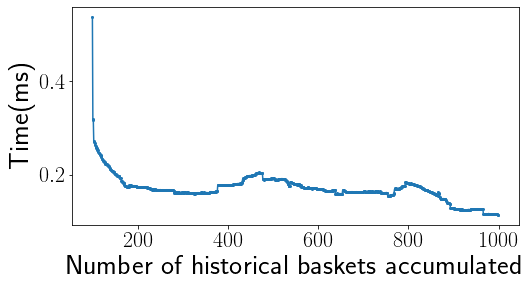

In [77]:
# inc_df = state_update_df.iloc[0:1000]
# this is the decremental from begining data

plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

state_update_df = pd.read_csv("../eval_results/improved_inc_baskets10_from_end/state_update_time_2021-04-02-14-18.csv")
state_update_df1 = pd.read_csv("../eval_results/improved_inc_baskets10_from_end/state_update_time_2021-04-02-14-53.csv")
state_update_df2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_end/state_update_time_2021-04-02-15-23.csv")


inc_df = state_update_df.iloc[0:1000] 
inc_df1 = state_update_df1.iloc[0:1000] 
inc_df2 = state_update_df2.iloc[0:1000] 



mean_time_improved_inc = (inc_df.ms + inc_df1.ms + inc_df2.ms )/3
# mean_time_improved_inc = ( inc_df1.ms + inc_df.ms )/2


fig = plt.figure(figsize=(8,4))

ax = plt.subplot()

# calculate the moving average window by n
ax.plot(mean_time_improved_inc.rolling(100).mean(), label="incremental baseline",  marker='o') # 2*200-2

ax.set_xlabel("Number of historical baskets accumulated")
ax.set_ylabel("Time(ms)")
# ax.set_ylim([0,2])
# ax.set_title("Time taken to update user vector for 1 incremental basket");
fig.savefig("../artifacts/baseline_inc.pdf", bbox_inches='tight')

# Improved vs baseline

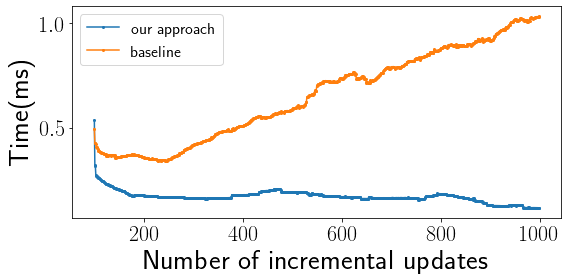

In [80]:


fig = plt.figure(figsize=(8,4))

ax = plt.subplot()

ax.plot(mean_time_improved_inc.rolling(100).mean(), label="our approach",  marker='o') # 2*200-2
ax.plot(mean_time_baseline_inc.rolling(100).mean(), label="baseline",  marker='o') # 2*200-2


ax.set_xlabel("Number of incremental updates")
ax.set_ylabel("Time(ms)")
# ax.set_ylim([0,2])
# ax.set_title("Retraining time: improved incremental vs baseline incremental");
ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/improved_inc_vs_baseline_inc.pdf", bbox_inches='tight')

# Improved decremetal case decremental from end

we start removing basket from the very end, we expect the time taken to be relatively constant

In [81]:
# inc_df = state_update_df.iloc[0:1000]

state_update_df = pd.read_csv("../eval_results/improved_inc_baskets10_from_end/state_update_time_2021-04-02-14-18.csv")
state_update_df1 = pd.read_csv("../eval_results/improved_inc_baskets10_from_end/state_update_time_2021-04-02-14-53.csv")
state_update_df2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_end/state_update_time_2021-04-02-15-23.csv")

dec_df = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df = dec_df.reset_index()

dec_df1 = state_update_df1.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df1 = dec_df1.reset_index()

dec_df2 = state_update_df2.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df2 = dec_df2.reset_index()

# fig = plt.figure(figsize=(8,6))
# ax = plt.subplot()

mean_time_improved_dec_from_end = (dec_df.ms + dec_df1.ms + dec_df2.ms )/3
mean_time_improved_dec_from_end = (dec_df.ms + dec_df2.ms)/2

# ax.plot(mean_time_improved_dec_from_end.rolling(100).mean(), label="decremenatal from the end",  marker='o') # 2*200-2

# ax.set_xlabel("# of historical baskets removed")
# ax.set_ylabel("Time(ms)")
# ax.set_ylim([0,3])
# ax.set_title("Time taken to update user vector for 1 decremental basket starting from the end");



we then look at removing basket from the very beginning, we expect the time taken to be longer at the beginning, and linearly going down, because of the number of baskets left to process

# Improved decremetal case decremental from start

In [82]:
# inc_df = state_update_df.iloc[0:1000]

state_update_df = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-02-15-57.csv")
state_update_df1 = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-05-14-34.csv")
state_update_df2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-05-15-12.csv")



dec_df = state_update_df.iloc[1000:-1]
dec_df = dec_df.reset_index()

dec_df1 = state_update_df1.iloc[1000:-1]
dec_df1 = dec_df1.reset_index()

dec_df2 = state_update_df2.iloc[1000:-1]
dec_df2 = dec_df2.reset_index()

# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot()

# mean_time_improved_dec_from_start = (dec_df.ms + dec_df1.ms + dec_df2.ms)/3

mean_time_improved_dec_from_start = dec_df2.ms 
# ax.plot(mean_time_improved_dec_from_start.rolling(100).mean(), label="decremenatal from the end",  marker='o') # 2*200-2

# ax.set_xlabel("# of historical baskets removed")
# ax.set_ylabel("Time(ms)")
# # ax.set_ylim([0,2])
# ax.set_title("Time taken to update user vector for 1 decremental basket starting from start");

# Improved decremetal case decremental from random place

In [83]:
# inc_df = state_update_df.iloc[0:1000]

state_update_df = pd.read_csv("../eval_results/improved_inc_baskets10_from_random/state_update_time_2021-04-05-20-00.csv")
state_update_df1 = pd.read_csv("../eval_results/improved_inc_baskets10_from_random/state_update_time_2021-04-05-20-36.csv")
state_update_df2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_random/state_update_time_2021-04-05-21-11.csv")


dec_df = state_update_df.iloc[1000:-1]
dec_df = dec_df.reset_index()



dec_df1 = state_update_df1.iloc[1000:-1]
dec_df1 = dec_df1.reset_index()

dec_df2 = state_update_df2.iloc[1000:-1]
dec_df2 = dec_df2.reset_index()

# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot()

mean_time_improved_dec_from_random = (dec_df.ms+dec_df1.ms + dec_df2.ms)/3
mean_time_improved_dec_from_random = (dec_df.ms + dec_df2.ms)/2


# ax.plot(mean_time_improved_dec_from_random.rolling(100).mean(), label="decremenatal from the end",  marker='o') # 2*200-2

# ax.set_xlabel("# of historical baskets removed")
# ax.set_ylabel("Time(ms)")
# ax.set_ylim([0,2])
# ax.set_title("Time taken to update user vector for 1 decremental basket starting from random");

# Improved decremental in one plot

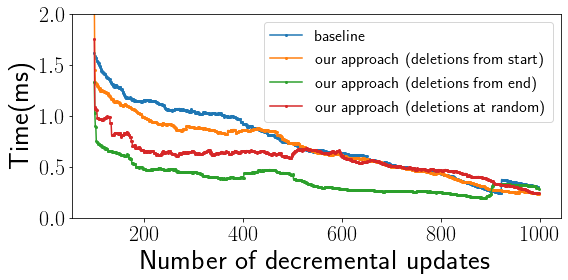

In [84]:
# putting it together with the baseline decremental
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()

ax.plot(mean_time_baseline_dec.rolling(100).mean(), label="baseline",  marker='o')

ax.plot(mean_time_improved_dec_from_start.rolling(100).mean(), label="our approach (deletions from start)",  marker='o') # 2*200-2
ax.plot(mean_time_improved_dec_from_end.rolling(100).mean(), label="our approach (deletions from end)",  marker='o') # 2*200-2
# mean_time_improved_dec_from_random
ax.plot(mean_time_improved_dec_from_random.rolling(100).mean(), label="our approach (deletions at random)",  marker='o') # 2*200-2




ax.legend()


ax.set_xlabel("Number of decremental updates")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,2])
# ax.set_title("Retraining time: improved decremental vs baseline decremental");
ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/improved_dec_vs_baseline_dec.pdf", bbox_inches='tight')

# hyper-parameters: group size

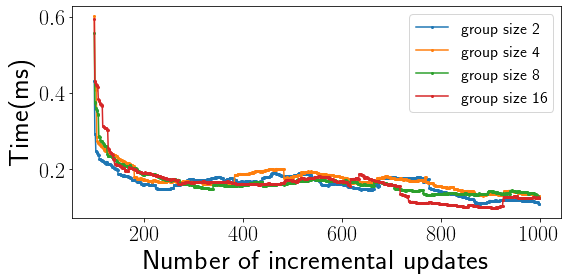

In [19]:
# inc_df = state_update_df.iloc[0:1000]
# this is the decremental from begining data


state_update_df_g2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-02-15-57.csv")
state_update_df_g4 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-15-26.csv")
state_update_df_g8 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-13-28.csv")
state_update_df_g16 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-16-08.csv")
state_update_df_g32 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-14-07.csv")

# state_update_df2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_end/state_update_time_2021-04-02-15-23.csv")

inc_df_g2 = state_update_df_g2.iloc[0:1000]
inc_df_g4 = state_update_df_g4.iloc[0:1000] 
inc_df_g8 = state_update_df_g8.iloc[0:1000]
inc_df_g16 = state_update_df_g16.iloc[0:1000] 
inc_df_g32 = state_update_df_g32.iloc[0:1000] 



mean_time_improved_g2 = (inc_df_g2.ms )
mean_time_improved_g4 = (inc_df_g4.ms )
mean_time_improved_g8 = (inc_df_g8.ms )
mean_time_improved_g16 = (inc_df_g16.ms )
mean_time_improved_g32 = (inc_df_g32.ms )


fig = plt.figure(figsize=(8,4))

ax = plt.subplot()

ax.plot(mean_time_improved_g2.rolling(100).mean(), label="group size 2",  marker='o') # 2*200-2
ax.plot(mean_time_improved_g4.rolling(100).mean(), label="group size 4",  marker='o') # 2*200-2
ax.plot(mean_time_improved_g8.rolling(100).mean(), label="group size 8",  marker='o') # 2*200-2
ax.plot(mean_time_improved_g16.rolling(100).mean(), label="group size 16",  marker='o') # 2*200-2
# ax.plot(mean_time_improved_g32.rolling(100).mean(), label="group size 32",  marker='o') # 2*200-2


ax.set_xlabel("Number of incremental updates")
ax.set_ylabel("Time(ms)")
# ax.set_ylim([0,0.5])
# ax.set_title("Run-time: incremental with group size");
ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/hp_group_size_inc_time.pdf", bbox_inches='tight');


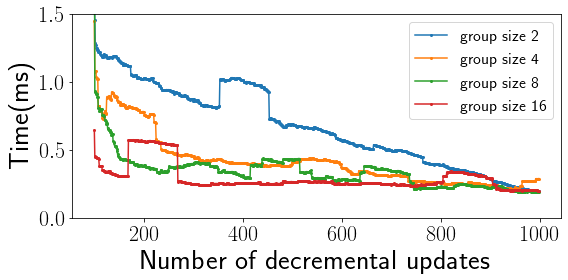

In [17]:
state_update_df_g2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-02-15-57.csv")
state_update_df_g4 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-15-26.csv")
state_update_df_g8 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-13-28.csv")
state_update_df_g16 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-16-08.csv")
state_update_df_g32 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-14-07.csv")

inc_df_g2 = state_update_df_g2.iloc[1000:-1]
inc_df_g2=inc_df_g2.reset_index()

inc_df_g4 = state_update_df_g4.iloc[1000:-1]
inc_df_g4=inc_df_g4.reset_index()

inc_df_g8 = state_update_df_g8.iloc[1000:-1]
inc_df_g8=inc_df_g8.reset_index()

inc_df_g16 = state_update_df_g16.iloc[1000:-1]
inc_df_g16=inc_df_g16.reset_index()

inc_df_g32 = state_update_df_g32.iloc[1000:-1]
inc_df_g32=inc_df_g32.reset_index()




mean_time_improved_g2 = (inc_df_g2.ms )
mean_time_improved_g4 = (inc_df_g4.ms )
mean_time_improved_g8 = (inc_df_g8.ms )
mean_time_improved_g16 = (inc_df_g16.ms )
mean_time_improved_g32 = (inc_df_g32.ms )


fig = plt.figure(figsize=(8,4))

ax = plt.subplot()

ax.plot(mean_time_improved_g2.rolling(100).mean(), label="group size 2",  marker='o') # 2*200-2
ax.plot(mean_time_improved_g4.rolling(100).mean(), label="group size 4",  marker='o') # 2*200-2

ax.plot(mean_time_improved_g8.rolling(100).mean(), label="group size 8",  marker='o') # 2*200-2
ax.plot(mean_time_improved_g16.rolling(100).mean(), label="group size 16",  marker='o') # 2*200-2

# ax.plot(mean_time_improved_g32.rolling(100).mean(), label="group size 32",  marker='o') # 2*200-2


ax.set_xlabel("Number of decremental updates")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,1.5])
# ax.set_title("Run-time: decremental with group size");
ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/hp_group_size_dec_time.pdf", bbox_inches='tight');


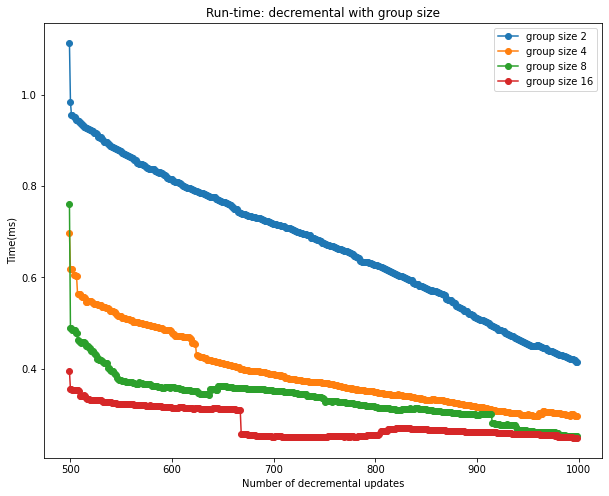

In [16]:
state_update_df_g2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-05-15-12.csv")
state_update_df_g4 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-15-26.csv")
state_update_df_g8 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-13-28.csv")
state_update_df_g16 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-16-08.csv")
state_update_df_g32 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-14-07.csv")

inc_df_g2 = state_update_df_g2.iloc[1000:-1]
inc_df_g2=inc_df_g2.reset_index()

inc_df_g4 = state_update_df_g4.iloc[1000:-1]
inc_df_g4=inc_df_g4.reset_index()

inc_df_g8 = state_update_df_g8.iloc[1000:-1]
inc_df_g8=inc_df_g8.reset_index()

inc_df_g16 = state_update_df_g16.iloc[1000:-1]
inc_df_g16=inc_df_g16.reset_index()

inc_df_g32 = state_update_df_g32.iloc[1000:-1]
inc_df_g32=inc_df_g32.reset_index()




mean_time_improved_g2 = (inc_df_g2.ms )
mean_time_improved_g4 = (inc_df_g4.ms )
mean_time_improved_g8 = (inc_df_g8.ms )
mean_time_improved_g16 = (inc_df_g16.ms )
# mean_time_improved_g32 = (inc_df_g32.ms )


fig = plt.figure(figsize=(10,8))

ax = plt.subplot()

ax.plot(mean_time_improved_g2.rolling(500).mean(), label="group size 2",  marker='o') # 2*200-2
ax.plot(mean_time_improved_g4.rolling(500).mean(), label="group size 4",  marker='o') # 2*200-2

ax.plot(mean_time_improved_g8.rolling(500).mean(), label="group size 8",  marker='o') # 2*200-2
ax.plot(mean_time_improved_g16.rolling(500).mean(), label="group size 16",  marker='o') # 2*200-2

# ax.plot(mean_time_improved_g32.rolling(100).mean(), label="group size 32",  marker='o') # 2*200-2


ax.set_xlabel("Number of decremental updates")
ax.set_ylabel("Time(ms)")
# ax.set_ylim([0,2])
ax.set_title("Run-time: decremental with group size");
ax.legend();
fig.savefig("../artifacts/hp_group_size_dec_time.pdf", bbox_inches='tight');


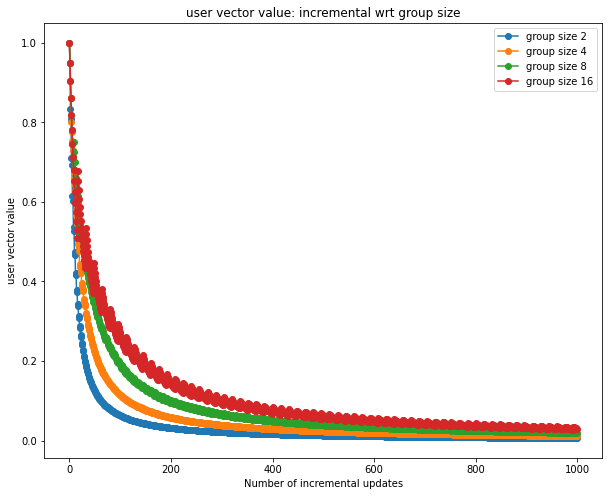

In [616]:
state_update_df_g2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-02-15-57.csv")
state_update_df_g4 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-15-26.csv")
state_update_df_g8 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-13-28.csv")
state_update_df_g16 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-16-44.csv")
state_update_df_g32 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-14-07.csv")

inc_df_g2 = state_update_df_g2.iloc[:1000]
inc_df_g4 = state_update_df_g4.iloc[:1000]

inc_df_g8 = state_update_df_g8.iloc[:1000]
inc_df_g16 = state_update_df_g16.iloc[:1000]

inc_df_g32 = state_update_df_g32.iloc[:1000]



user_vector_val_g2 = (inc_df_g2.userVectorFirstEle)
user_vector_val_g4 = (inc_df_g4.userVectorFirstEle)

user_vector_val_g8 = (inc_df_g8.userVectorFirstEle)
user_vector_val_g16 = (inc_df_g16.userVectorFirstEle)

user_vector_val_g32 = (inc_df_g32.userVectorFirstEle)


fig = plt.figure(figsize=(10,8))

ax = plt.subplot()
ax.plot(user_vector_val_g2, label="group size 2",  marker='o') # 2*200-2
ax.plot(user_vector_val_g4, label="group size 4",  marker='o') # 2*200-2
ax.plot(user_vector_val_g8, label="group size 8",  marker='o') # 2*200-2
ax.plot(user_vector_val_g16, label="group size 16",  marker='o') # 2*200-2

# ax.plot(user_vector_val_g32, label="group size 32",  marker='o') # 2*200-2


ax.set_xlabel("Number of incremental updates")
ax.set_ylabel("user vector value")
# ax.set_ylim([0,2])
ax.set_title("user vector value: incremental wrt group size");
ax.legend()

[  1.19038732 237.99744084]
[  1.09841083 465.26694119]
[  1.04751366 835.67532156]
[1.02584781e+00 1.75096426e+03]


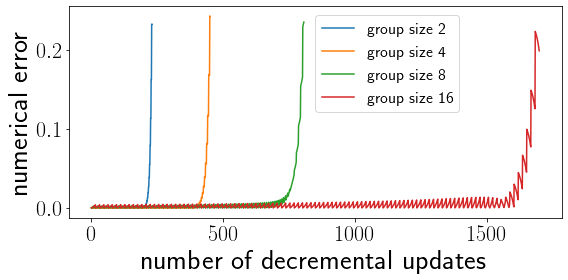

In [59]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

state_update_df_g2 = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-02-15-57.csv")

state_update_df_g8 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-13-28.csv")
state_update_df_g16 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-16-44.csv")
state_update_df_g32 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-14-07.csv")

inc_array_g2 = state_update_df_g2.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g2 = state_update_df_g2.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g2 = dec_array_g2[::-1][770:] - inc_array_g2[770:]
xdata_g2 = range(len(err_g2), 0,-1)
ydata_g2 = np.abs(err_g2)

# group 4
state_update_df_g4 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-15-26.csv")
inc_array_g4 = state_update_df_g4.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g4 = state_update_df_g4.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g4 = dec_array_g4[::-1][550:] - inc_array_g4[550:]
xdata_g4 = range(len(err_g4), 0,-1)
ydata_g4 = np.abs(err_g4)


# group 8
inc_array_g8 = state_update_df_g8.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8 = state_update_df_g8.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8 = dec_array_g8[::-1][195:] - inc_array_g8[195:]
xdata_g8 = range(len(err_g8), 0,-1)
ydata_g8 = np.abs(err_g8)

# group 16
inc_array_g16 = state_update_df_g16.iloc[:2000].userVectorFirstEle.to_numpy()
dec_array_g16 = state_update_df_g16.iloc[1999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g16 = dec_array_g16[::-1][304:] - inc_array_g16[304:]
xdata_g16 = range(len(err_g16), 0,-1)
ydata_g16 = np.abs(err_g16)

# group 32
inc_array_g32 = state_update_df_g32.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g32 = state_update_df_g32.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g32 = dec_array_g32[::-1][0:] - inc_array_g32[0:]
xdata_g32 = range(len(err_g32), 0,-1)
ydata_g32 = np.abs(err_g32)


def func(n, alpha, k):
    return pow(alpha,n-k)
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.plot(xdata_g2, ydata_g2, label="group size 2")
ax.plot(xdata_g4, ydata_g4, label="group size 4")
ax.plot(xdata_g8, ydata_g8, label="group size 8")
ax.plot(xdata_g16, ydata_g16, label="group size 16")
# ax.plot(xdata_g32, ydata_g32, label="error group size 32")

# group 2
popt, pcov = curve_fit(func, list(xdata_g2), ydata_g2, bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g2, func(list(xdata_g2), *popt), 'r--',
#         label='error fitting(gs=2): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# group 4
popt, pcov = curve_fit(func, list(xdata_g4), ydata_g4,p0=[1.1,600], bounds=([1., 0],[np.inf, np.inf]))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g4, func(list(xdata_g4), *popt),'--',
#         label='error fitting(gs=4): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# group 8
# add initial guess to avoid curve fitting failure
popt, pcov = curve_fit(func, list(xdata_g8), ydata_g8,p0=[1.2,730], bounds=([1., 0],[np.inf, np.inf]))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8, func(list(xdata_g8), *popt),'--',
#         label='error fitting(gs=8): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# group 16
# add initial guess to avoid curve fitting failure
popt, pcov = curve_fit(func, list(xdata_g16), ydata_g16,p0=[1.2,730], bounds=([1., 0],[np.inf, np.inf]))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g16, func(list(xdata_g16), *popt),'b--',
#         label='error fitting(gs=16): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# add initial guess to avoid curve fitting failure
# popt, pcov = curve_fit(func, list(xdata_g32), ydata_g32,p0=[1.2,730], bounds=([1., 0],[np.inf, np.inf]))
# print(popt)
# alpha = popt[0]
# epsilon = pow(alpha, -popt[1])
# ax.plot(xdata_g32, func(list(xdata_g32), *popt), 'g-', label='error fitting: $f(n) = \epsilon \\alpha^n$ = $({:.2e}) \\times {:.2f}^n$'.format(epsilon, alpha))

# fig = plt.figure(figsize=(8,4))

# ax = plt.subplot()

ax.set_xlabel("number of decremental updates")
ax.set_ylabel("numerical error")
# ax.set_title("Numerical error for decremental updates with varying group size\n fixed at  rb=0.9,rg=0.7")
ax.legend(loc=(0.5, 0.5));
# ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/hp_group_size_numeric_stab.pdf", bbox_inches='tight');


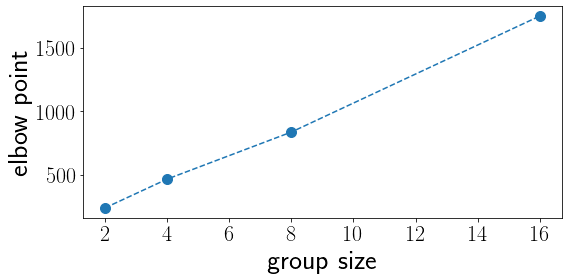

In [62]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.plot([2,4,8,16], [238,465,836,1751], "--", marker="o", markersize=10);

ax.set_xlabel("group size")
ax.set_ylabel("elbow point")
# ax.set_title("elbow point or max number of decremental update allowed")
plt.tight_layout()
plt.xticks(np.arange(2, 18, 2))
fig.savefig("../artifacts/hp_group_size_group_size_vs_elbow.pdf", bbox_inches='tight');


# hyper-parameters: rg

[ 1.7163031  55.96759971]
[  1.74690269 103.99373131]
[  1.27326842 169.98366033]
[  1.1903873  237.99744167]
[  1.12117023 358.16163049]
[  1.05720781 712.31220283]


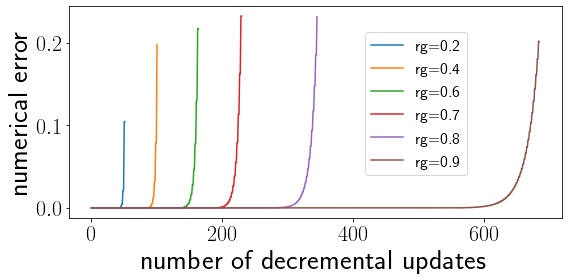

In [57]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

state_update_df_rg7 = pd.read_csv("../eval_results/improved_inc_baskets10_from_start/state_update_time_2021-04-02-15-57.csv")
state_update_df_rg5 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-10-56.csv")
state_update_df_rg3 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-11-35.csv")
state_update_df_rg9 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-12-53.csv")
state_update_df_rg8 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-13-34.csv")
state_update_df_rg8_rb3 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-14-39.csv")


# rg 0.2
state_update_df_rg2 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-17-36.csv")
inc_array_rg2 = state_update_df_rg2.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_rg2 = state_update_df_rg2.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_rg2 = dec_array_rg2[::-1][948:] - inc_array_rg2[948:]
xdata_rg2 = range(len(err_rg2), 0,-1)
ydata_rg2 = np.abs(err_rg2)

# rg 0.3
# inc_array_rg3 = state_update_df_rg3.iloc[:1000].userVectorFirstEle.to_numpy()
# dec_array_rg3 = state_update_df_rg3.iloc[999:-1].userVectorFirstEle.to_numpy()
# # adding the slicing to remove overflow stuff
# err_rg3 = dec_array_rg3[::-1][930:] - inc_array_rg3[930:]
# xdata_rg3 = range(len(err_rg3), 0,-1)
# ydata_rg3 = np.abs(err_rg3)

# rg 0.4
state_update_df_rg4 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-18-12.csv")
inc_array_rg4 = state_update_df_rg4.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_rg4 = state_update_df_rg4.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_rg4 = dec_array_rg4[::-1][899:] - inc_array_rg4[899:]
xdata_rg4 = range(len(err_rg4), 0,-1)
ydata_rg4 = np.abs(err_rg4)

# rg 0.5
# inc_array_rg5 = state_update_df_rg5.iloc[:1000].userVectorFirstEle.to_numpy()
# dec_array_rg5 = state_update_df_rg5.iloc[999:-1].userVectorFirstEle.to_numpy()
# # adding the slicing to remove overflow stuff
# err_rg5 = dec_array_rg5[::-1][882:] - inc_array_rg5[882:]
# xdata_rg5 = range(len(err_rg5), 0,-1)
# ydata_rg5 = np.abs(err_rg5)

# rg 0.6
state_update_df_rg6 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-18-48.csv")
inc_array_rg6 = state_update_df_rg6.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_rg6 = state_update_df_rg6.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_rg6 = dec_array_rg6[::-1][836:] - inc_array_rg6[836:]
xdata_rg6 = range(len(err_rg6), 0,-1)
ydata_rg6 = np.abs(err_rg6)

#  rg 0.7
inc_array_rg7 = state_update_df_rg7.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_rg7 = state_update_df_rg7.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_rg7 = dec_array_rg7[::-1][770:] - inc_array_rg7[770:]
xdata_rg7 = range(len(err_rg7), 0,-1)
ydata_rg7 = np.abs(err_rg7)

#  rg 0.8
inc_array_rg8 = state_update_df_rg8.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_rg8 = state_update_df_rg8.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_rg8 = dec_array_rg8[::-1][655:] - inc_array_rg8[655:]
xdata_rg8 = range(len(err_rg8), 0,-1)
ydata_rg8 = np.abs(err_rg8)

# rg 0.9
inc_array_rg9 = state_update_df_rg9.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_rg9 = state_update_df_rg9.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_rg9 = dec_array_rg9[::-1][316:] - inc_array_rg9[316:]
xdata_rg9 = range(len(err_rg9), 0,-1)
ydata_rg9 = np.abs(err_rg9)



def func(n, alpha, k):
    return pow(alpha,n-k)
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.plot(xdata_rg2, ydata_rg2, label="rg=0.2")
# ax.plot(xdata_rg3, ydata_rg3, label="error:rg=0.3,gs=2,rb=0.9")
ax.plot(xdata_rg4, ydata_rg4, label="rg=0.4")
# ax.plot(xdata_rg5, ydata_rg5, label="error:rg=0.5,gs=2,rb=0.9")
ax.plot(xdata_rg6, ydata_rg6, label="rg=0.6")
ax.plot(xdata_rg7, ydata_rg7, label="rg=0.7")
ax.plot(xdata_rg8, ydata_rg8, label="rg=0.8")
# ax.plot(xdata_rg8_rb3, ydata_rg8_rb3, label="error:rg=0.8,rb=0.3,gs=2")
ax.plot(xdata_rg9, ydata_rg9, label="rg=0.9")


# rg2
popt, pcov = curve_fit(func, list(xdata_rg2), ydata_rg2, p0=[1.2,50],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg3, func(list(xdata_rg3), *popt), 'r--',
#         label='error fitting(rg=0.3): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# rg3
# popt, pcov = curve_fit(func, list(xdata_rg3), ydata_rg3, p0=[1.2,50],bounds=([1., 0], np.inf))
# print(popt)
# alpha = popt[0]
# k = popt[1]
# epsilon = pow(alpha, -k)
# # ax.plot(xdata_rg3, func(list(xdata_rg3), *popt), 'r--',
# #         label='error fitting(rg=0.3): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rg4
popt, pcov = curve_fit(func, list(xdata_rg4), ydata_rg4, p0=[1.2,50],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg3, func(list(xdata_rg3), *popt), 'r--',
#         label='error fitting(rg=0.3): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# rg5
# popt, pcov = curve_fit(func, list(xdata_rg5), ydata_rg5, p0=[1.2,200],bounds=([1., 0], np.inf))
# print(popt)
# alpha = popt[0]
# k = popt[1]
# epsilon = pow(alpha, -k)
# # ax.plot(xdata_rg5, func(list(xdata_rg5), *popt), '--',
# #         label='error fitting(rg=0.5): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rg6
popt, pcov = curve_fit(func, list(xdata_rg6), ydata_rg6, p0=[1.2,200],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg5, func(list(xdata_rg5), *popt), '--',
#         label='error fitting(rg=0.5): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# rg7
popt, pcov = curve_fit(func, list(xdata_rg7), ydata_rg7, p0=[1.2,200],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg7, func(list(xdata_rg7), *popt), '--',
#         label='error fitting(rg=0.7): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rg8
popt, pcov = curve_fit(func, list(xdata_rg8), ydata_rg8, p0=[1.2,300],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg8, func(list(xdata_rg8), *popt), '--',
#         label='error fitting(rg=0.8): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rg9
popt, pcov = curve_fit(func, list(xdata_rg9), ydata_rg9, p0=[1.1,800],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg9, func(list(xdata_rg9), *popt), '--',
#         label='error fitting(rg=0.9): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

ax.set_xlabel("number of decremental updates")
ax.set_ylabel("numerical error")
# ax.set_title("Numerical error for decremental updates with varying grou decay rates \n fixed at rb=0.9, gs=2")
ax.legend(loc=(0.6, 0.2));
plt.tight_layout()

fig.savefig("../artifacts/hp_rg_numeric_stab.pdf", bbox_inches='tight');


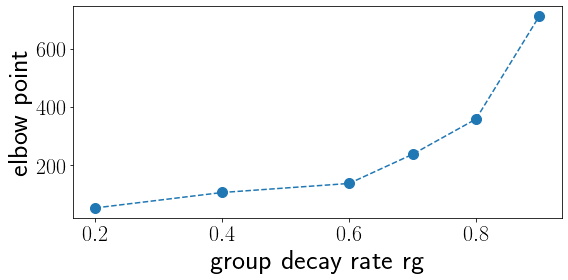

In [64]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.plot([0.2,0.4,0.6,0.7,0.8,0.9], [53,106,137,237,358,712], "--", marker="o",markersize=10);

ax.set_xlabel("group decay rate rg")
ax.set_ylabel("elbow point")
plt.tight_layout()

# ax.set_title("elbow point or max number of decremental update allowed")
fig.savefig("../artifacts/hp_group_size_vs_rg.pdf", bbox_inches='tight');


# hyper-parameters: rb

[  1.12117023 358.16163049]
[  1.12251116 362.01206569]


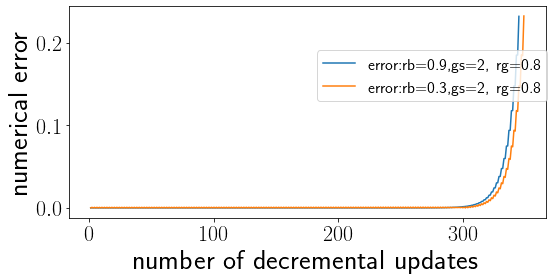

In [68]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


state_update_df_rg8_rb9 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-13-34.csv")
state_update_df_rg8_rb3 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-14-39.csv")
#  rb 09
inc_array_rg8_rb9 = state_update_df_rg8_rb9.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_rg8_rb9 = state_update_df_rg8_rb9.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_rg8_rb9 = dec_array_rg8_rb9[::-1][655:] - inc_array_rg8_rb9[655:]
xdata_rg8_rb9 = range(len(err_rg8_rb9), 0,-1)
ydata_rg8_rb9 = np.abs(err_rg8_rb9)

#  rb 03
inc_array_rg8_rb3 = state_update_df_rg8_rb3.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_rg8_rb3 = state_update_df_rg8_rb3.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_rg8_rb3 = dec_array_rg8_rb3[::-1][651:] - inc_array_rg8_rb3[651:]
xdata_rg8_rb3 = range(len(err_rg8_rb3), 0,-1)
ydata_rg8_rb3 = np.abs(err_rg8_rb3)



def func(n, alpha, k):
    return pow(alpha,n-k)
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()

ax.plot(xdata_rg8_rb9, ydata_rg8_rb9, label="error:rb=0.9,gs=2, rg=0.8")
ax.plot(xdata_rg8_rb3, ydata_rg8_rb3, label="error:rb=0.3,gs=2, rg=0.8")


# rb9
popt, pcov = curve_fit(func, list(xdata_rg8_rb9), ydata_rg8_rb9, p0=[1.2,300],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg8_rb9, func(list(xdata_rg8_rb9), *popt), '--',
#         label='error fitting(rb=0.9): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rb3
popt, pcov = curve_fit(func, list(xdata_rg8_rb3), ydata_rg8_rb3, p0=[1.2,300],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg8_rb3, func(list(xdata_rg8_rb3), *popt), '--',
#         label='error fitting(rb=0.3): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))



ax.set_xlabel("number of decremental updates")
ax.set_ylabel("numerical error")
# ax.set_title("Numerical error for decremental updates with varying basket decay rate\n fixed at gs=2, rg=0.8")
ax.legend(loc=(0.52, 0.55));
plt.tight_layout()

fig.savefig("../artifacts/hp_rb_numeric_stab.pdf", bbox_inches='tight');


[  1.09159438 473.30071103]
[  1.10382802 454.31801422]
[  1.09841086 465.26693569]


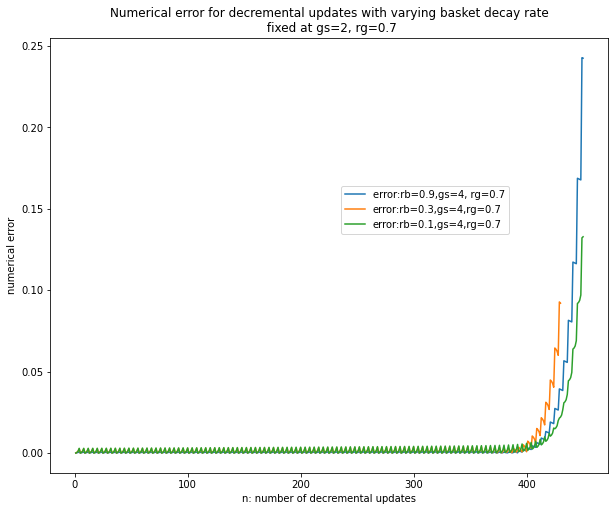

In [809]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# rg=0.7


# #  gs=8,rg=0.7,rb=0.9
# state_update_df_g8_rb9 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-13-28.csv")
# inc_array_g8_rb9 = state_update_df_g8_rb9.iloc[:1000].userVectorFirstEle.to_numpy()
# dec_array_g8_rb9 = state_update_df_g8_rb9.iloc[999:-1].userVectorFirstEle.to_numpy()
# # adding the slicing to remove overflow stuff
# err_g8_rb9 = dec_array_g8_rb9[::-1][185:] - inc_array_g8_rb9[185:]
# xdata_g8_rb9 = range(len(err_g8_rb9), 0,-1)
# ydata_g8_rb9 = np.abs(err_g8_rb9)

# #  gs=8,rg=0.7,rb=0.3
# state_update_df_g8_rb3 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-15-55.csv")
# inc_array_g8_rb3 = state_update_df_g8_rb3.iloc[:1000].userVectorFirstEle.to_numpy()
# dec_array_g8_rb3 = state_update_df_g8_rb3.iloc[999:-1].userVectorFirstEle.to_numpy()
# # adding the slicing to remove overflow stuff
# err_g8_rb3 = dec_array_g8_rb3[::-1][150:] - inc_array_g8_rb3[150:]
# xdata_g8_rb3 = range(len(err_g8_rb3), 0,-1)
# ydata_g8_rb3 = np.abs(err_g8_rb3)


# gs=4, rg=0.7, rb=0.9
state_update_df_g4 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-15-26.csv")
inc_array_g4 = state_update_df_g4.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g4 = state_update_df_g4.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g4 = dec_array_g4[::-1][550:] - inc_array_g4[550:]
xdata_g4 = range(len(err_g4), 0,-1)
ydata_g4 = np.abs(err_g4)

#  gs=4,rg=0.7,rb=0.3
state_update_df_g4_rb3 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-09-31.csv")
inc_array_g4_rb3 = state_update_df_g4_rb3.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g4_rb3 = state_update_df_g4_rb3.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g4_rb3 = dec_array_g4_rb3[::-1][570:] - inc_array_g4_rb3[570:]
xdata_g4_rb3 = range(len(err_g4_rb3), 0,-1)
ydata_g4_rb3 = np.abs(err_g4_rb3)

#  gs=4,rg=0.7,rb=0.1
state_update_df_g4_rb1 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-10-18.csv")
inc_array_g4_rb1 = state_update_df_g4_rb1.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g4_rb1 = state_update_df_g4_rb1.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g4_rb1 = dec_array_g4_rb1[::-1][550:] - inc_array_g4_rb1[550:]
xdata_g4_rb1 = range(len(err_g4_rb1), 0,-1)
ydata_g4_rb1 = np.abs(err_g4_rb1)


def func(n, alpha, k):
    return pow(alpha,n-k)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot()

# ax.plot(xdata_g8_rb3, ydata_g8_rb3, label="error:rb=0.9,gs=8, rg=0.7")
# ax.plot(xdata_g8_rb9, ydata_g8_rb9, label="error:rb=0.3,gs=8, rg=0.7")

# ax.plot(xdata_rg8_rb9, ydata_rg8_rb9, label="error:rb=0.9,gs=2, rg=0.7")
# ax.plot(xdata_rg8_rb3, ydata_rg8_rb3, label="error:rb=0.3,gs=2, rg=0.7")

ax.plot(xdata_g4, ydata_g4, label="error:rb=0.9,gs=4, rg=0.7")
ax.plot(xdata_g4_rb3, ydata_g4_rb3, label="error:rb=0.3,gs=4,rg=0.7")
ax.plot(xdata_g4_rb1, ydata_g4_rb1, label="error:rb=0.1,gs=4,rg=0.7")



# rb1
popt, pcov = curve_fit(func, list(xdata_g4_rb1), ydata_g4_rb1, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg8_rb9, func(list(xdata_rg8_rb9), *popt), '--',
#         label='error fitting(rb=0.9): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# rb3
popt, pcov = curve_fit(func, list(xdata_g4_rb3), ydata_g4_rb3, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg8_rb9, func(list(xdata_rg8_rb9), *popt), '--',
#         label='error fitting(rb=0.9): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# rb9
popt, pcov = curve_fit(func, list(xdata_g4), ydata_g4, p0=[1.2,300],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_rg8_rb9, func(list(xdata_rg8_rb9), *popt), '--',
#         label='error fitting(rb=0.9): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))



ax.set_xlabel("n: number of decremental updates")
ax.set_ylabel("numerical error")
ax.set_title("Numerical error for decremental updates with varying basket decay rate\n fixed at gs=2, rg=0.7")
ax.legend(loc=(0.52, 0.55));
fig.savefig("../artifacts/hp_rb_numeric_stab.pdf", bbox_inches='tight');


[  1.09161702 473.32682388]
[  1.05218473 904.65799554]
[  1.04488712 882.02726514]
[  1.05689184 869.82650058]
[  1.09516015 984.0698012 ]
[  1.04668392 859.0927349 ]
[  1.04641153 848.22194104]
[  1.04654585 854.4039687 ]
[  1.04906902 834.33542333]


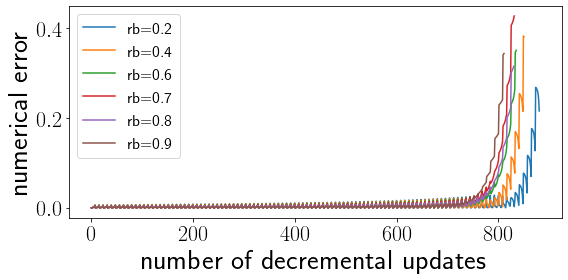

In [71]:
# experiment at gs=8, the effect is more obvious

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#  gs=8,rg=0.7,rb=0.9
state_update_df_g8_rb9 = pd.read_csv("../eval_results/hyperparams/state_update_time_2021-04-07-13-28.csv")
inc_array_g8_rb9 = state_update_df_g8_rb9.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb9 = state_update_df_g8_rb9.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb9 = dec_array_g8_rb9[::-1][189:] - inc_array_g8_rb9[189:]
xdata_g8_rb9 = range(len(err_g8_rb9), 0,-1)
ydata_g8_rb9 = np.abs(err_g8_rb9)

#  gs=8,rg=0.7,rb=0.8
state_update_df_g8_rb8 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-14-31.csv")
inc_array_g8_rb8 = state_update_df_g8_rb8.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb8 = state_update_df_g8_rb8.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb8 = dec_array_g8_rb8[::-1][170:] - inc_array_g8_rb8[170:]
xdata_g8_rb8 = range(len(err_g8_rb8), 0,-1)
ydata_g8_rb8 = np.abs(err_g8_rb8)

#  gs=8,rg=0.7,rb=0.7
state_update_df_g8_rb7 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-13-49.csv")
inc_array_g8_rb7 = state_update_df_g8_rb7.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb7 = state_update_df_g8_rb7.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb7 = dec_array_g8_rb7[::-1][169:] - inc_array_g8_rb7[169:]
xdata_g8_rb7 = range(len(err_g8_rb7), 0,-1)
ydata_g8_rb7 = np.abs(err_g8_rb7)


#  gs=8,rg=0.7,rb=0.6
state_update_df_g8_rb6 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-12-02.csv")
inc_array_g8_rb6 = state_update_df_g8_rb6.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb6 = state_update_df_g8_rb6.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb6 = dec_array_g8_rb6[::-1][165:] - inc_array_g8_rb6[165:]
xdata_g8_rb6 = range(len(err_g8_rb6), 0,-1)
ydata_g8_rb6 = np.abs(err_g8_rb6)


#  gs=8,rg=0.7,rb=0.5
# state_update_df_g8_rb5 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-13-11.csv")
state_update_df_g8_rb5 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-16-29.csv")
inc_array_g8_rb5 = state_update_df_g8_rb5.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb5 = state_update_df_g8_rb5.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb5 = dec_array_g8_rb5[::-1][20:] - inc_array_g8_rb5[20:]
xdata_g8_rb5 = range(len(err_g8_rb5), 0,-1)
ydata_g8_rb5 = np.abs(err_g8_rb5)

#  gs=8,rg=0.7,rb=0.4
state_update_df_g8_rb4 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-15-50.csv")
inc_array_g8_rb4 = state_update_df_g8_rb4.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb4 = state_update_df_g8_rb4.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb4 = dec_array_g8_rb4[::-1][150:] - inc_array_g8_rb4[150:]
xdata_g8_rb4 = range(len(err_g8_rb4), 0,-1)
ydata_g8_rb4 = np.abs(err_g8_rb4)

#  gs=8,rg=0.7,rb=0.3
state_update_df_g8_rb3 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-08-15-55.csv")
inc_array_g8_rb3 = state_update_df_g8_rb3.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb3 = state_update_df_g8_rb3.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb3 = dec_array_g8_rb3[::-1][150:] - inc_array_g8_rb3[150:]
xdata_g8_rb3 = range(len(err_g8_rb3), 0,-1)
ydata_g8_rb3 = np.abs(err_g8_rb3)

#  gs=8,rg=0.7,rb=0.2
state_update_df_g8_rb2 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-15-10.csv")
inc_array_g8_rb2 = state_update_df_g8_rb2.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb2 = state_update_df_g8_rb2.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb2 = dec_array_g8_rb2[::-1][120:] - inc_array_g8_rb2[120:]
xdata_g8_rb2 = range(len(err_g8_rb2), 0,-1)
ydata_g8_rb2 = np.abs(err_g8_rb2)

#  gs=8,rg=0.7,rb=0.1
state_update_df_g8_rb1 = pd.read_csv("../eval_results/hyperparams_rg/state_update_time_2021-04-09-10-18.csv")
inc_array_g8_rb1 = state_update_df_g8_rb1.iloc[:1000].userVectorFirstEle.to_numpy()
dec_array_g8_rb1 = state_update_df_g8_rb1.iloc[999:-1].userVectorFirstEle.to_numpy()
# adding the slicing to remove overflow stuff
err_g8_rb1 = dec_array_g8_rb1[::-1][545:] - inc_array_g8_rb1[545:]
xdata_g8_rb1 = range(len(err_g8_rb1), 0,-1)
ydata_g8_rb1 = np.abs(err_g8_rb1)

def func(n, alpha, k):
    return pow(alpha,n-k)
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
# ax.plot(xdata_g8_rb1, ydata_g8_rb1, label="error:rb=0.1,gs=8,rg=0.7")
ax.plot(xdata_g8_rb2, ydata_g8_rb2, label="rb=0.2")
# ax.plot(xdata_g8_rb3, ydata_g8_rb3, label="error:rb=0.3,gs=8,rg=0.7")
ax.plot(xdata_g8_rb4, ydata_g8_rb4, label="rb=0.4")
# ax.plot(xdata_g8_rb5, ydata_g8_rb5, label="error:rb=0.5,gs=8,rg=0.7")
ax.plot(xdata_g8_rb6, ydata_g8_rb6, label="rb=0.6")
ax.plot(xdata_g8_rb7, ydata_g8_rb7, label="rb=0.7")
ax.plot(xdata_g8_rb8, ydata_g8_rb8, label="rb=0.8")
ax.plot(xdata_g8_rb9, ydata_g8_rb9, label="rb=0.9")




# rb1
popt, pcov = curve_fit(func, list(xdata_g8_rb1), ydata_g8_rb1, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8_rb1, func(list(xdata_g8_rb1), *popt), '--',
#         label='error fitting(rb=0.1): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rb2
popt, pcov = curve_fit(func, list(xdata_g8_rb2), ydata_g8_rb2, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8_rb1, func(list(xdata_g8_rb1), *popt), '--',
#         label='error fitting(rb=0.1): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# rb3
popt, pcov = curve_fit(func, list(xdata_g8_rb3), ydata_g8_rb3, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8_rb3, func(list(xdata_g8_rb3), *popt), '--',
#         label='error fitting(rb=0.3): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rb4
popt, pcov = curve_fit(func, list(xdata_g8_rb4), ydata_g8_rb4, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8_rb3, func(list(xdata_g8_rb3), *popt), '--',
#         label='error fitting(rb=0.3): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rb5
popt, pcov = curve_fit(func, list(xdata_g8_rb5), ydata_g8_rb5, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)


# rb6
popt, pcov = curve_fit(func, list(xdata_g8_rb6), ydata_g8_rb6, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8_rb6, func(list(xdata_g8_rb6), *popt), '--',
#         label='error fitting(rb=0.6): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rb7
popt, pcov = curve_fit(func, list(xdata_g8_rb7), ydata_g8_rb7, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8_rb6, func(list(xdata_g8_rb6), *popt), '--',
#         label='error fitting(rb=0.6): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))

# rb8
popt, pcov = curve_fit(func, list(xdata_g8_rb8), ydata_g8_rb8, p0=[1.1,465],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8_rb6, func(list(xdata_g8_rb6), *popt), '--',
#         label='error fitting(rb=0.6): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))


# rb9
popt, pcov = curve_fit(func, list(xdata_g8_rb9), ydata_g8_rb9, p0=[1.2,300],bounds=([1., 0], np.inf))
print(popt)
alpha = popt[0]
k = popt[1]
epsilon = pow(alpha, -k)
# ax.plot(xdata_g8_rb9, func(list(xdata_g8_rb9), *popt), '--',
#         label='error fitting(rb=0.9): $f(n) = {:.2f}^{{n-{:.0f}}}$'.format(alpha, k))



ax.set_xlabel("number of decremental updates")
ax.set_ylabel("numerical error")
# ax.set_title("Numerical error for decremental updates with varying basket decay rate\n fixed at gs=8, rg=0.7")
ax.legend();
plt.tight_layout()
fig.savefig("../artifacts/hp_rb_numeric_stab.pdf", bbox_inches='tight');


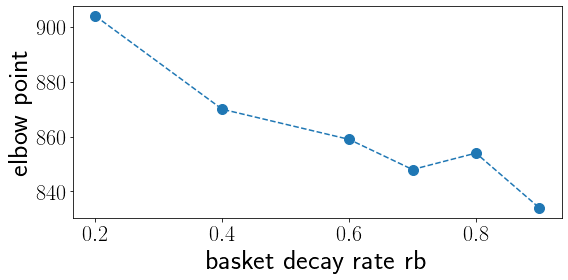

In [74]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
# plt.plot([0.1,0.3,0.5,0.6,0.7,0.9], [473,882,1004, 859,846,834],"--", marker="o")
plt.plot([0.2,0.4,0.6,0.7,0.8,0.9], [904,870,859,848,854,834],"--", marker="o", markersize=10)

ax.set_xlabel("basket decay rate rb")
ax.set_ylabel("elbow point")
# ax.set_title("elbow point or max number of decremental update allowed")
plt.tight_layout()

fig.savefig("../artifacts/hp_rb_trend.pdf", bbox_inches='tight');
